# Data Description

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features `V1, V2, … V28` are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Loading Packages

In [11]:
# Loading common libraries for data manipulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import os

# Loading Dataset

In [13]:
Dataset_path=os.getcwd()+"/Datasets/creditcard.csv"

In [14]:
Dataset=pd.read_csv(Dataset_path)

In [15]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
Dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Sampling Data

We shall split the data into `Training_data` and `Test_data` using SRSWOR with $80\%$ percent transactions in training data and $20\%$ transactions in test data 

In [17]:
Training_data=Dataset.sample(random_state=2,n=int(Dataset.shape[0]*0.8))
Training_index=sorted(Training_data.index.tolist())

Test_index=set(list(range(1,Dataset.shape[0]+1))).difference(Training_index)
Test_data=Dataset[Dataset.index.isin(Test_index)]

In [18]:
# Saving Training data and Test data in the disc.

# Training_data.to_csv("Datasets/Training_data.csv")
# Test_data.to_csv("Datasets/Test_data.csv")

# Data Visualisation

1. We shall plot, project the data points on few 2-D planes to gain more failiarity with the data points. Moreover we make a circle around every projected data point whose area is proportional to the transaction amount.
2. We shall see at what time fraud transaction usually takes place.

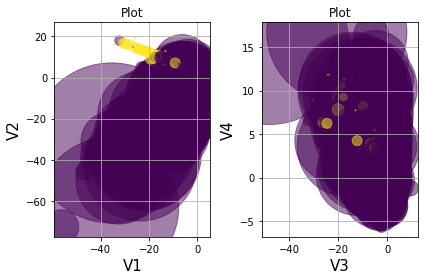

In [19]:
fig, [ax1,ax2] = plt.subplots(1,2)
ax1.scatter(Training_data["V1"],Training_data["V2"], c=Training_data["Class"], s=Training_data["Amount"], alpha=0.5)
ax1.set_xlabel("V1", fontsize=15)
ax1.set_ylabel("V2", fontsize=15)
ax1.set_title('Plot')
ax1.grid(True)

ax2.scatter(Training_data["V3"],Training_data["V4"], c=Training_data["Class"], s=Training_data["Amount"], alpha=0.5)
ax2.set_xlabel("V3", fontsize=15)
ax2.set_ylabel("V4", fontsize=15)
ax2.set_title('Plot')
ax2.grid(True)

fig.tight_layout()

plt.show()

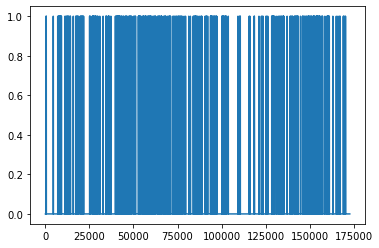

In [20]:
plt.plot(Dataset["Time"],Dataset["Class"])

### Obervations

1. In the first picture from the second plot, we observe that the fraud transactions are seperable using some non linear curves. Hence, algorithms like Logitic Regression, SVM classifier, Neural Network may solve our problem.
2. The transaction amount of fraud transactions are small. (Radius of yellow circles is small)
3. From the second picture, it looks like there is no preferable time for fraud transactions. We will try to conform this claim in the subsequent sections using Non parametric tests like Wald–Wolfowitz runs test

# Classification methods

We will now use different classification models and train our model. To measure our model accuracy we shall consider the following performance metrics-
1. **Confusion Matrix:** For a model with $n$ classes, the confusion matrix is an $n\times n$ matrix whose $ij^{th}$ element contains numbers of instances of class $i$ classified as class $j$. For a perfect classifier the matrix will be a diagonal matrix. In our case we have only two classes, $0$ and $1$. We label $0$ as negative and $1$ as positive. Therefore, the confusion matrix takes the following form-

| |Predicted Negative | Predicted Positive |
|---|---|---|
| Actual Negative | TN | FP |
| Actual Positive | FN | TP |

2. **Precision Score:** It is percentage of true positive instances among all positive predicted instances $=\dfrac{TP}{\text{Total Positive} }=\dfrac{TP}{TP+FP}$
3. **Recall:** It is the percentage of true true positive instances among actual positive instances $=\dfrac{TP}{\text{Actual positive instances} }=\dfrac{TP}{TP+FN}$
4. **F$_1$ Score:** It is the harmonic mean of precison and recall. Harmonic mean of two numbers in $[0,1]$ is high only if none of them is very close to zero. Hence, F_$1$ Score is high iff both precision and recall are high and none of them is small.
5. **ROC Curve:** ROC curve plots the true positive rate (recall) against the false positive rate (FPR).





In [21]:
X = Training_data.iloc[:,0:30]
y = Training_data["Class"]

import sklearn.linear_model as lm
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics

In [22]:
Training_data.head()
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
225184,144140.0,-0.581460,0.950267,0.115938,-1.384767,1.388364,-1.595678,2.120867,-0.718954,-0.205211,...,-0.292792,0.153480,0.656548,-0.514192,0.077220,0.736220,-0.302469,-0.254862,-0.126279,12.82
116637,74369.0,0.686730,-0.785586,0.945092,1.476634,-1.191074,-0.193185,-0.217963,-0.011827,0.727172,...,0.388521,0.277960,0.419683,-0.314303,0.427369,0.426733,-0.285560,0.022906,0.079838,256.39
99414,67107.0,-0.848395,1.214313,0.954869,-0.030145,-0.177527,-0.851855,0.444232,0.369063,-1.005181,...,0.079630,0.205928,0.552455,-0.064845,0.590082,-0.271787,0.276440,0.217840,0.127724,16.44
217619,140965.0,-1.104465,0.616952,-0.878973,-0.312839,-0.092112,-0.020623,1.422463,0.442278,-0.406603,...,0.511897,0.265005,0.438796,0.413781,0.649776,-0.082746,0.520578,0.151103,0.216899,270.00
279878,169155.0,2.061985,-0.114758,-1.079406,0.427062,-0.229701,-1.241109,0.121975,-0.283331,0.679923,...,-0.284520,-0.299538,-0.772333,0.352777,0.021161,-0.330437,0.198512,-0.076625,-0.061905,1.29


## SGD Classifier

In [23]:
sgd_clf = lm.SGDClassifier(loss="hinge", penalty="l2", max_iter=300)

In [24]:
sgd_clf.fit(X, y)
sgd_clf.predict(X[1:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
skfolds = sklearn.model_selection.StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X, y):
    sgd_clone_clf = clone(sgd_clf)
    
    X_train_folds = X.iloc[train_index,:]
    y_train_folds = y.iloc[train_index]
    X_test_fold = X.iloc[test_index,:]
    y_test_fold = y.iloc[test_index]
    
    sgd_clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = sgd_clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9934956352289036
0.998222468004424
0.9981566334860694


In [26]:
y_predict_sgd = cross_val_predict(sgd_clf, X, y, cv=3)

In [27]:
sklearn.metrics.confusion_matrix(y, y_predict_sgd)

array([[227439,      9],
       [   396,      1]])

In [28]:
[sklearn.metrics.precision_score(y, y_predict_sgd),
sklearn.metrics.recall_score(y, y_predict_sgd),
sklearn.metrics.f1_score(y, y_predict_sgd)]

[0.1, 0.0025188916876574307, 0.004914004914004914]

In [29]:
y_sgd_threshold = cross_val_predict(sgd_clf, X, y, cv=3, method="decision_function")

In [30]:
sgd_precisions, sgd_recalls, sgd_thresholds = sklearn.metrics.precision_recall_curve(y, y_sgd_threshold)

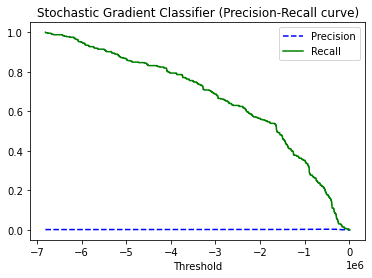

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, title):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.title(title+" (Precision-Recall curve)")
    plt.legend() # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(sgd_precisions, sgd_recalls, sgd_thresholds, "Stochastic Gradient Classifier")
plt.show()

We observe that changing the threshold value doesn't has any effect on the 

## Logistic regression

In [32]:
# del lr_clf
del Dataset

In [33]:
lr_clf=lm.LogisticRegression(max_iter=350,random_state=0)
lr_clf.fit(X,y)

LogisticRegression(max_iter=350, random_state=0)

In [34]:
skfolds = sklearn.model_selection.StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X, y):
    lr_clone_clf = clone(lr_clf)
    
    X_train_folds = X.iloc[train_index,:]
    y_train_folds = y.iloc[train_index]
    X_test_fold = X.iloc[test_index,:]
    y_test_fold = y.iloc[test_index]
    
    lr_clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = lr_clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9992494963725658


/home/nitin/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991309843577184
0.9991968188760731


In [35]:
y_predict_lr=cross_val_predict(lr_clf, X, y, cv=3)

/home/nitin/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
sklearn.metrics.confusion_matrix(y,y_predict_lr)

array([[227404,     44],
       [   140,    257]])

In [37]:
[sklearn.metrics.precision_score(y, y_predict_lr),
sklearn.metrics.recall_score(y, y_predict_lr),
sklearn.metrics.f1_score(y, y_predict_lr)]

[0.8538205980066446, 0.6473551637279596, 0.7363896848137536]

In [38]:
y_lr_threshold = cross_val_predict(lr_clf, X, y, cv=3, method="decision_function")
lr_precisions, lr_recalls, lr_thresholds = sklearn.metrics.precision_recall_curve(y, y_lr_threshold)

/home/nitin/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


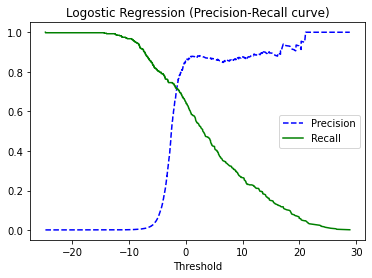

In [39]:
plot_precision_recall_vs_threshold(lr_precisions, lr_recalls, lr_thresholds, "Logostic Regression")
plt.show()

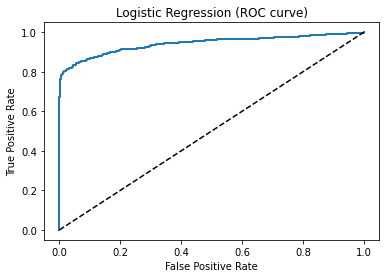

In [40]:
lr_fpr, lr_tpr, lr_thresholds = sklearn.metrics.roc_curve(y, y_lr_threshold)

def plot_roc_curve(fpr, tpr, title, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title+" (ROC curve)")
    [...] # Add axis labels and grid

plot_roc_curve(lr_fpr, lr_tpr, "Logistic Regression")
plt.show()

In [41]:
sklearn.metrics.roc_auc_score(y, y_lr_threshold)

0.9426159643919386

# Conclusion

The SGD Classifier doesn't works well for our given data, while Logistic Regression turns out to be a decent classifier.

# Future Work

In the next version we shall use other classification models like SVM and Neural Networks and shall evaluate their performance based on difference performance metris like specificity, ROC etc. 